## Observations and Insights 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice.
mice_number = len(combined_df["Mouse ID"].unique())
mice_number

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_df = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df = len(cleaned_df["Mouse ID"].unique())
cleaned_mouse_df

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Calculate the average of the tumor volume per drug regimen
mean_regimen = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()

# Calculate the median of the tumor volume per drug regimen
median_regimen = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()

# Calculate the variance of the tumor volume per drug regimen
variance_regimen = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()

# Calculate the standard deviation of the tumor volume per drug regimen
std_regimen = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()

# Calculate the SEM of the tumor volume per drug regimen
sem_regimen = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# Create a DataFrame for the summary statistics table
summary_statistics = pd.DataFrame({
    "Mean": mean_regimen,
    "Median": median_regimen,
    "Variance": variance_regimen,
    "Standard Deviation": std_regimen,
    "SEM": sem_regimen
})
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

stats_groupby = cleaned_df.groupby("Drug Regimen")
stats_summary = stats_groupby.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
stats_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

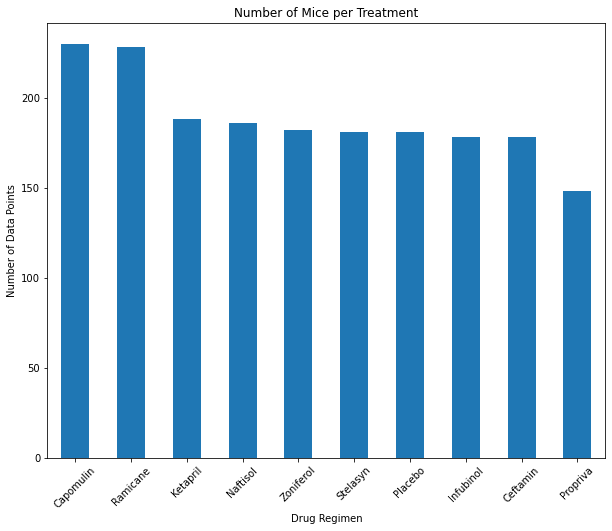

In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Grouped data for plotting
bar_plot = cleaned_df.groupby("Drug Regimen")["Drug Regimen"].count()

# Sorted the data in descending order
bar_plot.sort_values(inplace = True, ascending = False)

# Created bar plot
bar_plot.plot(kind="bar", x="Drug Regimen", figsize=(10,8))
              
plt.title("Number of Mice per Treatment", fontsize=12)
plt.xlabel("Drug Regimen", fontsize=10)
plt.xticks(rotation=45)
plt.ylabel("Number of Data Points", fontsize=10)p

# Saved bar plot and displayed
plt.savefig("Images/pandas_bar.png")
plt.show()

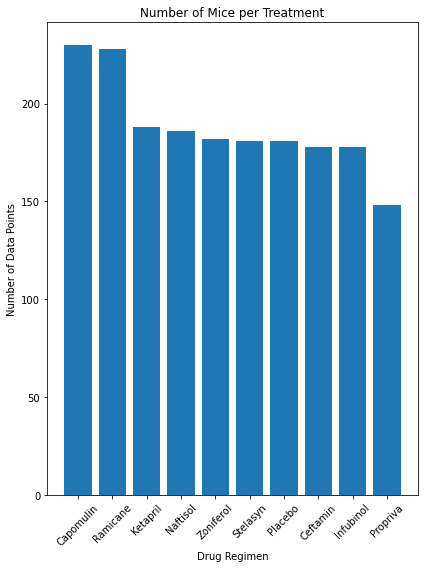

In [91]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Grouped data for plotting
bar_chart = cleaned_df['Drug Regimen'].value_counts()

# Created bar plot using pyplot
plt.bar(bar_chart.index.values, bar_chart.values, align="center")

# Set the title and axis labels
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# Rotated the x axis labels
plt.xticks(rotation=45)

# Saved bar plot and displayed
plt.rcParams["figure.figsize"] = (6, 8)
plt.tight_layout()
plt.savefig("Images/pyplot_bar.png")
plt.show()

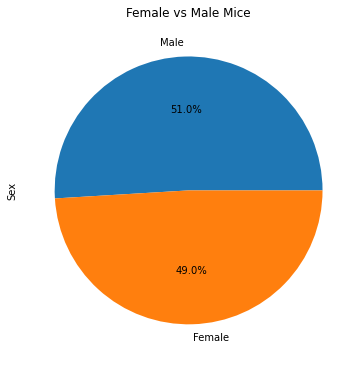

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Grouped data for plotting
pie_plot = cleaned_df.groupby("Sex")["Sex"].count()

# Sorted the data in descending order
pie_plot.sort_values(inplace = True, ascending = False)

# Created pie plot
pie_plot.plot(kind="pie", autopct="%1.1f%%")
              
# Set title labels
plt.title("Female vs Male Mice", fontsize=12)

# Saved pie plot and displayed
plt.savefig("Images/pandas_pie.png")
plt.show()

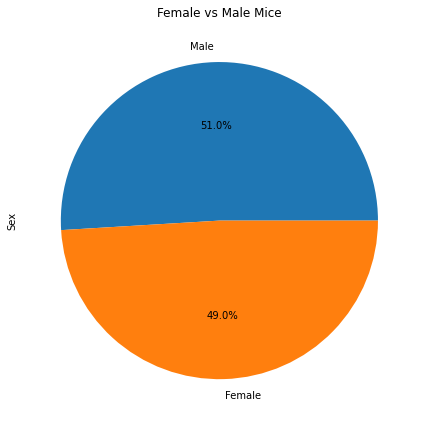

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Grouped data for plotting
pie_chart = cleaned_df['Sex'].value_counts()

# Created pie plot using pyplot
plt.pie(pie_chart.values, labels=pie_chart.index.values, autopct='%1.1f%%')

# Set title and y labels
plt.title("Female vs Male Mice", fontsize=12)
plt.ylabel("Sex")

# Saved pie plot and displayed
plt.tight_layout()
plt.savefig("Images/pyplot_pie.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = cleaned_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(cleaned_df, greatest_timepoint, on=("Mouse ID", "Timepoint"), how="inner")
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [103]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merge_df.loc[(merge_df["Drug Regimen"] == treatment)]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])

    # Calculate the 25th and 75th quartile
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    # Calculate the IQR
    iqr = upperq-lowerq
    
    # Calculate the lower and upper bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    

    # Calculate potential outliers using the lower and upper bounds
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    if len(outliers) > 0:
        print(f"What is the outlier for {treatment} ?")
        for outlier in outliers:
            print(outlier)

What is the outlier for Infubinol ?
36.321345799999996


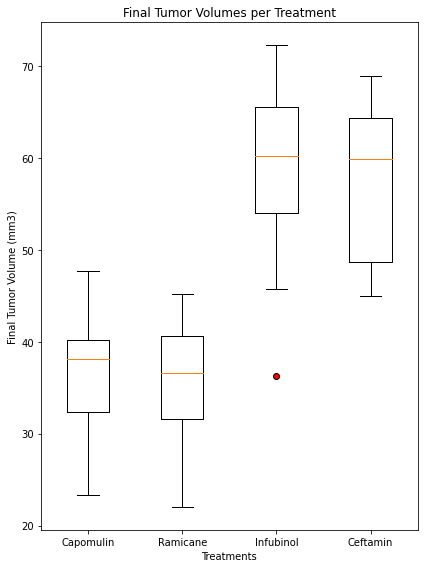

In [108]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Set the color for the outlier
red_circle = dict(markerfacecolor='red', marker='o')

# Generate box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes per Treatment')
ax1.boxplot(tumor_vol_data, labels = treatment_list, flierprops=red_circle)

# Set x axis and y axis labels
plt.xlabel("Treatments")
plt.ylabel('Final Tumor Volume (mm3)')

# Saved box plot and displayed
plt.tight_layout()
plt.savefig("Images/boxplot.png")
plt.show()

## Line and Scatter Plots

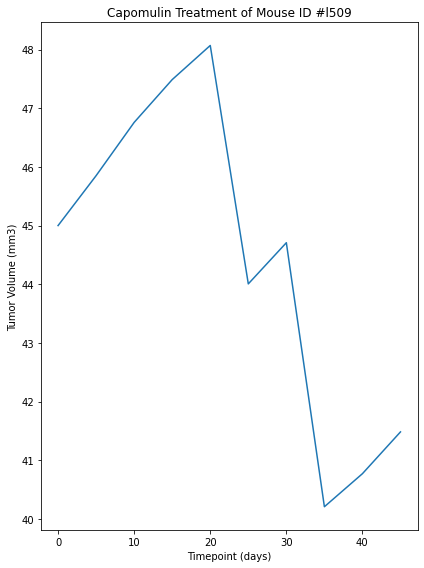

In [111]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Get the mouse id and other data for capomulin
capomulin = cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"]
mouse_id = capomulin.loc[capomulin['Mouse ID']== 'l509']

# Generate line plot
plt.plot(mouse_id["Timepoint"], mouse_id["Tumor Volume (mm3)"])

# Set title and axis labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse ID #l509')

# Saved line plot and displayed
plt.tight_layout()
plt.savefig("Images/lineplot.png")
plt.show()

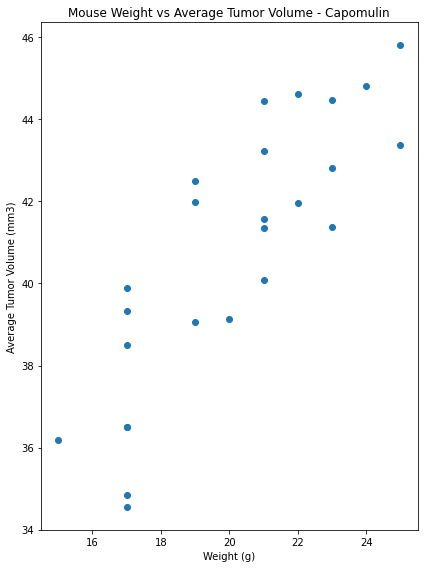

In [112]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Get the mouse id and other data for capomulin
capomulin = cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"]

# Calculate the average tumor volume
capomulin_avg = capomulin.groupby(['Mouse ID']).mean()

# Generate scatter plot
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

# Set title and axis labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume - Capomulin')

# Saved scatter plot and displayed
plt.tight_layout()
plt.savefig("Images/scatterplot.png")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
